In [2]:
import pyarrow.parquet as pq
import pandas as pd
from clustergram import Clustergram
import sklearn
import cudf
import matplotlib.pyplot as plt
import pickle



# Import the complete case data and Groups

In [3]:
# Import complete cases
df = cudf.read_parquet('/rapids/my_data/usa.bg.cc.parquet')
# Import groups
gp = cudf.read_parquet('/rapids/my_data/data/usa.bg.cl.group.parquet') 

In [4]:
df

,GEOID,Male_Under_5_years,Male_5_to_9_years,Male_10_to_14_years,Male_15_to_17_years,Male_20_years,Male_21_years,Male_22_to_24_years,Male_25_to_29_years,Male_30_to_34_years,...,Tablet_or_other_portable_wireless_computer_with_no_other_type_of_computing_device,No_Computer,Dial_up_with_no_other_type_of_Internet_subscription,Cellular_data_plan_with_no_other_type_of_Internet_subscription,Broadband_such_as_cable_fiber_optic_or_DSL_with_no_other_type_of_Internet_subscription,Satellite_Internet_service,Internet_access_without_a_subscription,No_Internet_access,Under_18_With_a_broadband_Internet_subscription,Under_18_Without_an_Internet_subscription
0,020130001001,-3.955508,-6.000000,-6.000000,-5.763099,-4.455404,-6.000000,-3.057724,-2.303734,-2.705826,...,-3.423176,-2.197225,-6.000000,-3.263576,-3.001272,-2.386467,-3.610918,0.748939,-2.348726,-2.926739
1,020130001002,-3.458307,-3.514030,-3.283414,-4.406719,-4.720121,-6.000000,-3.485803,-3.173878,-3.736026,...,-3.964886,-1.584120,-6.000000,-3.708137,-2.519998,-2.559235,-3.252587,-0.522189,-1.785746,-2.477098
2,020130001003,-4.357563,-4.583265,-3.553615,-4.015954,-6.000000,-6.000000,-4.117753,-2.949777,-3.355153,...,-6.000000,-2.534720,-6.000000,-3.946424,-2.765060,-1.291259,-2.949439,-1.079744,-2.039596,-2.854082
3,020160001001,-3.263576,-3.652820,-3.324600,-3.048942,-3.946961,-4.649719,-5.465948,-3.001272,-2.770354,...,-4.590057,-2.436897,-6.000000,-1.986732,-2.746202,-2.308125,-3.311585,-1.318576,-1.203973,-2.877949
4,020160002001,-3.900909,-4.014261,-4.108226,-4.455932,-5.474893,-4.912130,-3.874401,-2.964944,-3.120895,...,-6.000000,-3.206803,-5.545177,-1.751486,-3.504556,-1.691018,-3.206803,-2.005018,-1.781771,-3.900625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236770,560459511001,-3.134890,-3.359537,-3.209880,-4.105591,-6.000000,-6.000000,-3.969702,-3.164269,-4.002041,...,-4.153661,-2.018559,-6.000000,-0.633800,-2.264897,-2.613117,-4.338597,-1.548813,-1.176574,-5.370056
236771,560459511002,-4.940343,-3.891162,-4.501116,-6.000000,-3.532359,-6.000000,-4.697228,-4.287193,-2.871452,...,-6.000000,-1.514128,-6.000000,-2.997455,-1.386294,-1.995539,-2.961831,-1.427794,-2.514836,-3.665963
236772,560459513001,-2.661693,-2.393339,-6.000000,-3.173704,-6.000000,-6.000000,-6.000000,-2.689457,-2.661693,...,-6.000000,-2.224072,-6.000000,-0.723179,-2.179642,-2.654095,-1.787119,-1.755058,-1.023043,-6.000000
236773,560459513002,-4.680706,-3.266200,-6.000000,-3.590076,-6.000000,-6.000000,-3.226991,-3.189153,-3.082945,...,-6.000000,-3.512540,-6.000000,-1.345764,-1.417966,-3.164068,-1.369487,-3.214868,-1.457516,-6.000000


In [5]:
gp

,GEOID,cluster
0,020130001001,6.0
1,020130001002,6.0
2,020130001003,6.0
3,020160001001,6.0
4,020160002001,7.0
...,...,...
236770,560459511001,3.0
236771,560459511002,3.0
236772,560459513001,3.0
236773,560459513002,6.0


In [6]:
# Set index
df = df.set_index('GEOID')
gp = gp.set_index('GEOID')

In [7]:
# Append clusters
df_merged = df.merge(gp, on=['GEOID'], how='left')

In [8]:
df_merged

,Male_Under_5_years,Male_5_to_9_years,Male_10_to_14_years,Male_15_to_17_years,Male_20_years,Male_21_years,Male_22_to_24_years,Male_25_to_29_years,Male_30_to_34_years,Male_35_to_39_years,...,No_Computer,Dial_up_with_no_other_type_of_Internet_subscription,Cellular_data_plan_with_no_other_type_of_Internet_subscription,Broadband_such_as_cable_fiber_optic_or_DSL_with_no_other_type_of_Internet_subscription,Satellite_Internet_service,Internet_access_without_a_subscription,No_Internet_access,Under_18_With_a_broadband_Internet_subscription,Under_18_Without_an_Internet_subscription,cluster
0,-4.907293,-2.811527,-2.762709,-4.664113,-4.664113,-6.000000,-3.676643,-4.036960,-4.594446,-2.565668,...,-1.039336,-3.686955,-1.807195,-2.928722,-2.180627,-3.768922,-1.180499,-0.881525,-6.000000,6.0
1,-6.000000,-2.978696,-3.269705,-5.381870,-3.451000,-5.536678,-3.877899,-5.536678,-4.927254,-3.877899,...,-2.053309,-6.000000,-1.317759,-2.500655,-3.899214,-6.000000,-1.500772,-1.922938,-6.000000,3.0
2,-3.381845,-2.564065,-4.899497,-3.824452,-6.000000,-6.000000,-5.490589,-3.283130,-3.748663,-4.256863,...,-2.253170,-4.985317,-0.726441,-3.203100,-3.791158,-4.285309,-2.104515,-1.194030,-6.000000,3.0
3,-3.193012,-4.235810,-3.413403,-3.623050,-6.000000,-6.000000,-3.843316,-2.700914,-3.107835,-3.498238,...,-2.670575,-6.000000,-1.221466,-3.362688,-3.232895,-6.000000,-2.217225,-1.148453,-5.286582,3.0
4,-5.303305,-5.013963,-6.000000,-4.194693,-6.000000,-6.000000,-3.327089,-3.545213,-3.545213,-6.000000,...,-2.329493,-6.000000,-0.342005,-6.000000,-3.538887,-3.401197,-2.329493,-1.033654,-3.673766,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236770,-3.838428,-3.967739,-2.930269,-5.647968,-6.000000,-4.251043,-2.972791,-3.767896,-4.251043,-3.580944,...,-2.067529,-6.000000,-2.390183,-2.301286,-3.056976,-3.491647,-1.365736,-1.255405,-6.000000,5.0
236771,-3.637586,-4.079654,-3.583519,-3.694577,-4.964940,-6.000000,-3.998201,-3.694577,-3.306671,-3.391219,...,-2.175833,-5.033701,-1.392373,-2.346070,-2.644270,-4.107590,-1.730799,-1.658642,-5.067506,3.0
236772,-3.711352,-3.293590,-2.682877,-3.688324,-5.435903,-4.677217,-4.247396,-4.738389,-4.371647,-3.580180,...,-2.335895,-4.238445,-1.189849,-2.486449,-2.234117,-3.825739,-2.155260,-1.069895,-6.000000,3.0
236773,-3.356897,-4.067316,-3.561600,-3.377796,-5.099866,-4.729428,-3.336397,-4.197202,-3.951930,-3.220979,...,-3.076390,-4.382027,-1.115142,-3.308717,-2.525729,-5.236442,-2.380703,-1.284207,-6.000000,3.0


In [9]:
# Count of Block Gropups by Cluster
df_merged.cluster.value_counts()

3.0    50341
4.0    39921
5.0    39038
6.0    34475
1.0    31219
7.0    26645
2.0    15136
Name: cluster, dtype: int32

In [10]:
#Split DF and remove cluster
groups = df_merged.groupby(df_merged.cluster)
df_merged_1 = groups.get_group(1)
df_merged_2 = groups.get_group(2)
df_merged_3 = groups.get_group(3)
df_merged_4 = groups.get_group(4)
df_merged_5 = groups.get_group(5)
df_merged_6 = groups.get_group(6)
df_merged_7 = groups.get_group(7)

#remove cluster column
del df_merged_1['cluster']
del df_merged_2['cluster']
del df_merged_3['cluster']
del df_merged_4['cluster']
del df_merged_5['cluster']
del df_merged_6['cluster']
del df_merged_7['cluster']

#convert to pandas
df_merged_1= df_merged_1.to_pandas()
df_merged_2= df_merged_2.to_pandas()
df_merged_3= df_merged_3.to_pandas()
df_merged_4= df_merged_4.to_pandas()
df_merged_5= df_merged_5.to_pandas()
df_merged_6= df_merged_6.to_pandas()
df_merged_7= df_merged_7.to_pandas()

In [11]:
#Fit Clustergrams
df_merged_1_cgram = Clustergram(range(1, 8), backend='sklearn',n_init=1000)
df_merged_1_cgram.fit(df_merged_1)

df_merged_2_cgram = Clustergram(range(1, 8), backend='sklearn',n_init=1000)
df_merged_2_cgram.fit(df_merged_2)

df_merged_3_cgram = Clustergram(range(1, 8), backend='sklearn',n_init=1000)
df_merged_3_cgram.fit(df_merged_3)

df_merged_4_cgram = Clustergram(range(1, 8), backend='sklearn',n_init=1000)
df_merged_4_cgram.fit(df_merged_4)

df_merged_5_cgram = Clustergram(range(1, 8), backend='sklearn',n_init=1000)
df_merged_5_cgram.fit(df_merged_5)

df_merged_6_cgram = Clustergram(range(1, 8), backend='sklearn',n_init=1000)
df_merged_6_cgram.fit(df_merged_6)

df_merged_7_cgram = Clustergram(range(1, 8), backend='sklearn',n_init=1000)
df_merged_7_cgram.fit(df_merged_7)


K=1 skipped. Mean computed from data directly.
K=2 fitted in 253.5373477935791 seconds.
K=3 fitted in 507.88190960884094 seconds.
K=4 fitted in 836.7220752239227 seconds.
K=5 fitted in 672.1538374423981 seconds.
K=6 fitted in 548.3459272384644 seconds.
K=7 fitted in 709.1960566043854 seconds.
K=1 skipped. Mean computed from data directly.
K=2 fitted in 219.39957070350647 seconds.
K=3 fitted in 241.95765471458435 seconds.
K=4 fitted in 283.01245522499084 seconds.
K=5 fitted in 285.3742551803589 seconds.
K=6 fitted in 398.75723338127136 seconds.
K=7 fitted in 427.736145734787 seconds.
K=1 skipped. Mean computed from data directly.
K=2 fitted in 303.3746745586395 seconds.
K=3 fitted in 391.79079484939575 seconds.
K=4 fitted in 379.1705322265625 seconds.
K=5 fitted in 644.2531020641327 seconds.
K=6 fitted in 657.843893289566 seconds.
K=7 fitted in 747.3952066898346 seconds.
K=1 skipped. Mean computed from data directly.
K=2 fitted in 262.33274149894714 seconds.
K=3 fitted in 309.6337485313

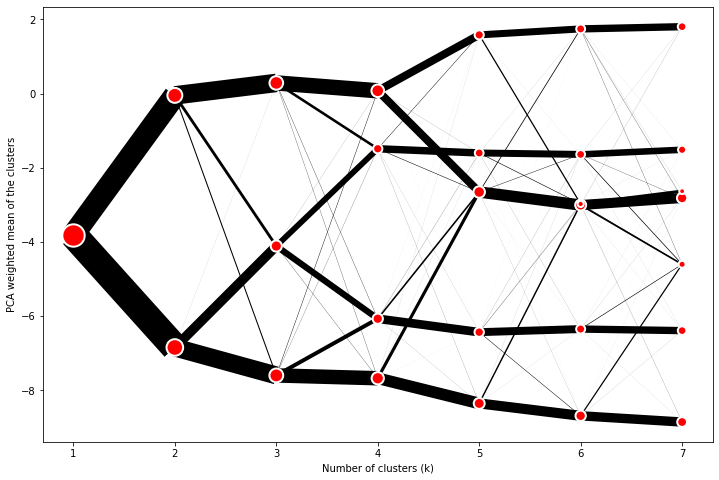

In [12]:
df_merged_1_cgram.plot(figsize=(12, 8))
plt.savefig('../clustergram_C1.pdf')

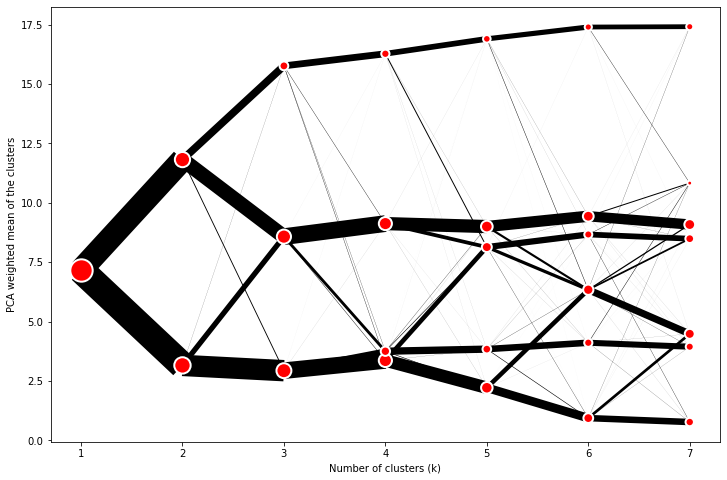

In [13]:
df_merged_2_cgram.plot(figsize=(12, 8))
plt.savefig('../clustergram_C2.pdf')

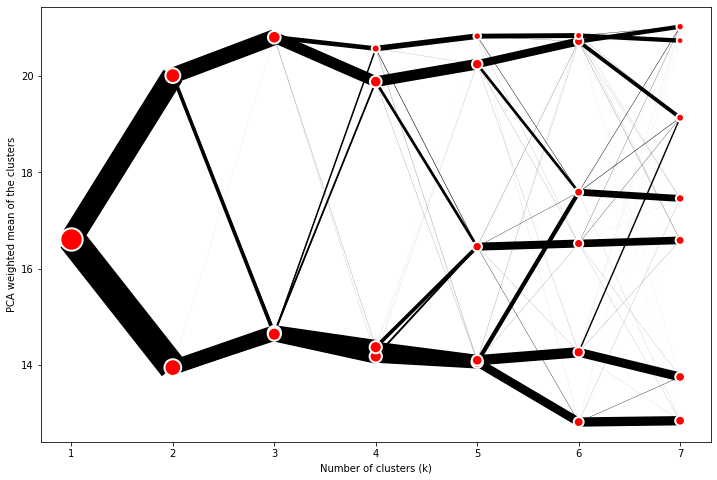

In [14]:
df_merged_3_cgram.plot(figsize=(12, 8))
plt.savefig('../clustergram_C3.pdf')

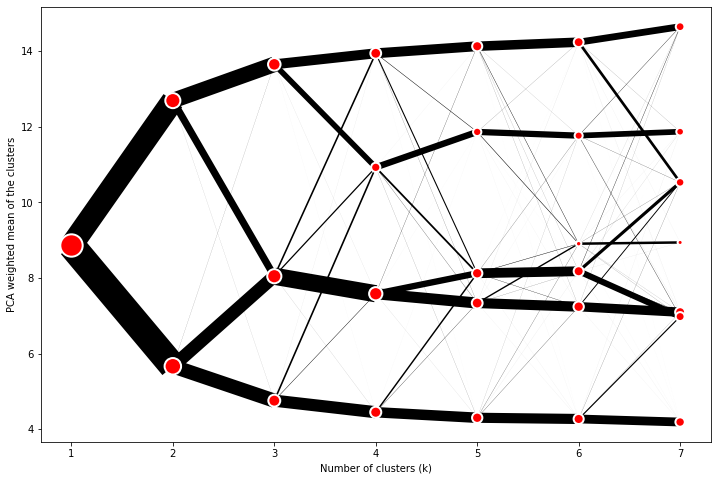

In [15]:
df_merged_4_cgram.plot(figsize=(12, 8))
plt.savefig('../clustergram_C4.pdf')

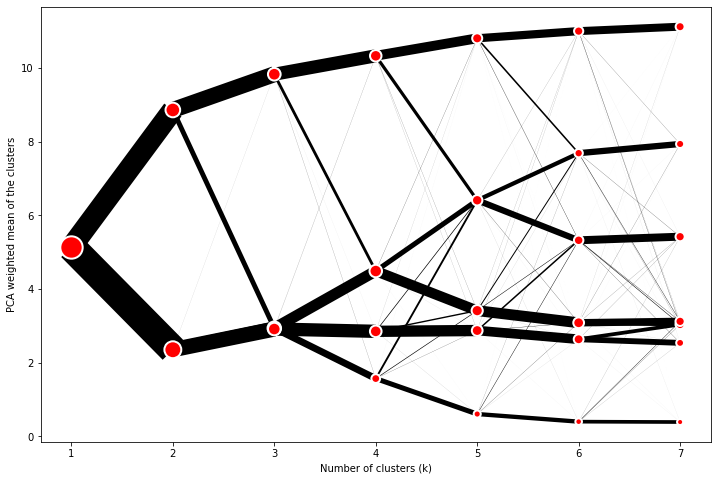

In [16]:
df_merged_5_cgram.plot(figsize=(12, 8))
plt.savefig('../clustergram_C5.pdf')

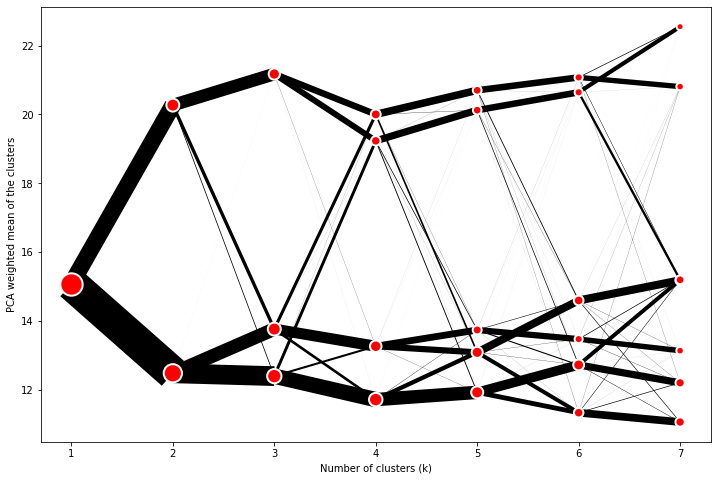

In [17]:
df_merged_6_cgram.plot(figsize=(12, 8))
plt.savefig('../clustergram_C6.pdf')

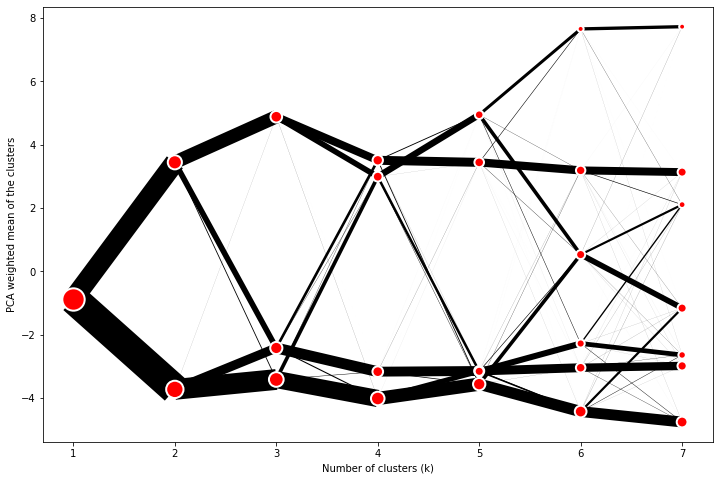

In [18]:
df_merged_7_cgram.plot(figsize=(12, 8))
plt.savefig('../clustergram_C7.pdf')